In [143]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE = 42

In [3]:
dataset = load_boston()
X = pd.DataFrame(dataset.data)
X.columns = dataset.feature_names
y = dataset.target

In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y.shape

(506,)

1. Разделите выборку на обучающую и тестовую в отношении 80%/20%

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

2. Обучите стандартную регрессию, а также Ridge и  Lasso и параметрами по умолчанию и выведите их R2 на тестовой выборке

In [7]:
result = pd.DataFrame(columns = ['model', 'params', 'R2_score', 'MSE', 'Coefficients'])

In [8]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params':{'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': model.coef_}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 14.5 ms, sys: 1.59 ms, total: 16 ms
Wall time: 19.5 ms


model       LinearRegression()
R2_score              0.668759
MSE                  24.291119
Name: 0, dtype: object

In [9]:
%%time
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params':{'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': model.coef_}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 10.9 ms, sys: 1.5 ms, total: 12.4 ms
Wall time: 11.4 ms


model         Ridge()
R2_score     0.666222
MSE         24.477191
Name: 1, dtype: object

In [10]:
%%time
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params':{'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': model.coef_}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 13.5 ms, sys: 2.36 ms, total: 15.9 ms
Wall time: 16.4 ms


model        Lasso()
R2_score    0.667145
MSE         24.40949
Name: 2, dtype: object

In [11]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."


**Вывод: 
Таким образом, модели на параметрах по умолчанию показали одинаковый результат**

3. Для Ridge и Lasso подберите коэффициент регуляризации(используйте GridSearchCV, RidgeCV, LassoCV) в пределах от $10^{-5}$ до $10^5$ (по степеням 10). Посчитайте R2 на тестовой выборке по лучшим моделям и сравните с предыдущими результатами. Напишите как изменился результат

Подберем коэффициент регуляризации для Ridge 2мя способами через GridSearchCV и RidgeCV

*GridSearchCV(Ridge)*

In [12]:
%%time
estimator = Ridge()
parametrs = {'alpha': np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 568 ms, sys: 24.4 ms, total: 592 ms
Wall time: 368 ms


model       GridSearchCV(estimator=Ridge(),\n             ...
R2_score                                             0.668759
MSE                                                  24.29112
Name: 3, dtype: object

*RidgeCV*

In [13]:
%%time
model = RidgeCV(alphas=np.logspace(-5, 5, 11))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': model.alpha_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 10.3 ms, sys: 1.11 ms, total: 11.4 ms
Wall time: 10.6 ms


model       RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...
R2_score                                             0.668751
MSE                                                 24.291744
Name: 4, dtype: object

*GridSearchCV(Lasso)*

In [14]:
%%time
estimator = Lasso()
parametrs = {'alpha': np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 351 ms, sys: 16.2 ms, total: 367 ms
Wall time: 354 ms


model       GridSearchCV(estimator=Lasso(),\n             ...
R2_score                                              0.66876
MSE                                                 24.291092
Name: 5, dtype: object

*LassoCV*

In [15]:
%%time
model = LassoCV(alphas=np.logspace(-5, 5, 11))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': model.alpha_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 28.8 ms, sys: 1.62 ms, total: 30.4 ms
Wall time: 21.9 ms


model       LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...
R2_score                                              0.66876
MSE                                                 24.291092
Name: 6, dtype: object

In [16]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."
3,"GridSearchCV(estimator=Ridge(),\n ...",{'alpha': 1e-05},0.668759,24.291120,
4,"RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.01,0.668751,24.291744,
5,"GridSearchCV(estimator=Lasso(),\n ...",{'alpha': 1e-05},0.668760,24.291092,
6,"LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.00001,0.668760,24.291092,


**Вывод: 
Таким образом, подбор коэффициента регуляризации в данном случае не принес ощутимого улучшения R2 почти не изменился.
При прочих равных RidgeCV, LassoCV работают на порядок быстрее GridSearchCV.**

4. Проведите масштабирование выборки(используйте Pipeline, StandardScaler, MinMaxScaler), посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [17]:
%%time
model = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': {'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 19.5 ms, sys: 1.78 ms, total: 21.3 ms
Wall time: 15 ms


model       (StandardScaler(), Ridge())
R2_score                       0.668462
MSE                           24.312904
Name: 7, dtype: object

In [18]:
%%time
model = Pipeline([('scaler', MinMaxScaler()), ('Ridge', Ridge())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': {'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 14.6 ms, sys: 1.73 ms, total: 16.3 ms
Wall time: 12.4 ms


model       (MinMaxScaler(), Ridge())
R2_score                      0.67641
MSE                         23.730076
Name: 8, dtype: object

In [19]:
%%time
model = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': {'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 14.8 ms, sys: 1.95 ms, total: 16.7 ms
Wall time: 17.3 ms


model       (StandardScaler(), Lasso())
R2_score                       0.623943
MSE                           27.577692
Name: 9, dtype: object

In [20]:
%%time
model = Pipeline([('scaler', MinMaxScaler()), ('Lasso', Lasso())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':model, 'params': {'alpha': 1.0}, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 9.59 ms, sys: 166 µs, total: 9.76 ms
Wall time: 10 ms


model       (MinMaxScaler(), Lasso())
R2_score                     0.257392
MSE                         54.458243
Name: 10, dtype: object

In [21]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."
3,"GridSearchCV(estimator=Ridge(),\n ...",{'alpha': 1e-05},0.668759,24.291120,
4,"RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.01,0.668751,24.291744,
5,"GridSearchCV(estimator=Lasso(),\n ...",{'alpha': 1e-05},0.668760,24.291092,
6,"LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.00001,0.668760,24.291092,
7,"(StandardScaler(), Ridge())",{'alpha': 1.0},0.668462,24.312904,
8,"(MinMaxScaler(), Ridge())",{'alpha': 1.0},0.676410,23.730076,
9,"(StandardScaler(), Lasso())",{'alpha': 1.0},0.623943,27.577692,


**Вывод: 
Таким образом, применение масштабирования также не привело к положительному результату, а в случае с Lasso даже навредило**

5. Подберите коэффициент регуляризации для Ridge и Lasso на масштабированных данных, посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [22]:
%%time
estimator = Pipeline([('scaler', StandardScaler()), ('model', Ridge())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(StandardScaler+Ridge)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 842 ms, sys: 33.5 ms, total: 875 ms
Wall time: 535 ms


model       GridSearchCV(StandardScaler+Ridge)
R2_score                              0.668462
MSE                                  24.312904
Name: 11, dtype: object

In [23]:
%%time
estimator = Pipeline([('scaler', MinMaxScaler()), ('model', Ridge())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(MinMaxScaler+Ridge)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 651 ms, sys: 17 ms, total: 668 ms
Wall time: 396 ms


model       GridSearchCV(MinMaxScaler+Ridge)
R2_score                            0.670031
MSE                                24.197875
Name: 12, dtype: object

In [24]:
%%time
estimator = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(StandardScaler+Lasso)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 448 ms, sys: 5.99 ms, total: 454 ms
Wall time: 330 ms


model       GridSearchCV(StandardScaler+Lasso)
R2_score                              0.668759
MSE                                  24.291153
Name: 13, dtype: object

In [25]:
%%time
estimator = Pipeline([('scaler', MinMaxScaler()), ('model', Lasso())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(MinMaxScaler+Lasso)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 303 ms, sys: 5.3 ms, total: 308 ms
Wall time: 309 ms


model       GridSearchCV(MinMaxScaler+Lasso)
R2_score                            0.668761
MSE                                24.291045
Name: 14, dtype: object

In [26]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."
3,"GridSearchCV(estimator=Ridge(),\n ...",{'alpha': 1e-05},0.668759,24.291120,
4,"RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.01,0.668751,24.291744,
5,"GridSearchCV(estimator=Lasso(),\n ...",{'alpha': 1e-05},0.668760,24.291092,
6,"LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.00001,0.668760,24.291092,
7,"(StandardScaler(), Ridge())",{'alpha': 1.0},0.668462,24.312904,
8,"(MinMaxScaler(), Ridge())",{'alpha': 1.0},0.676410,23.730076,
9,"(StandardScaler(), Lasso())",{'alpha': 1.0},0.623943,27.577692,


**Вывод: 
Таким образом, применение масштабирования c последующим подбором параметров модель сильно не улучшило, кроме GridSearchCV(MinMaxScaler+Lasso)**

6. Добавьте попарные произведения признаков и их квадраты (используйте PolynomialFeatures) на масштабированных признаках, посчитайте R2 и сравните с предыдущими результатами. Напишите как изменился результат

In [27]:
%%time
estimator = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Ridge())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(StandardScaler+PolyF+Ridge)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 714 ms, sys: 10.5 ms, total: 724 ms
Wall time: 413 ms


model       GridSearchCV(StandardScaler+PolyF+Ridge)
R2_score                                    0.818047
MSE                                        13.343332
Name: 15, dtype: object

In [28]:
%%time
estimator = Pipeline([('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()), ('model', Ridge())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(MinMaxScaler+PolyF+Ridge)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 697 ms, sys: 8.03 ms, total: 705 ms
Wall time: 373 ms


model       GridSearchCV(MinMaxScaler+PolyF+Ridge)
R2_score                                  0.850063
MSE                                      10.995444
Name: 16, dtype: object

In [29]:
%%time
estimator = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Lasso())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(StandardScaler+PolyF+Lasso)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715.1056055083382, tolerance: 2.882109046439629
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718.7540715258442, tolerance: 2.764448730650155
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812.8595198198157, tolerance: 2.710494922600619
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

CPU times: user 1.35 s, sys: 18.5 ms, total: 1.37 s
Wall time: 747 ms


model       GridSearchCV(StandardScaler+PolyF+Lasso)
R2_score                                    0.812217
MSE                                        13.770851
Name: 17, dtype: object

In [30]:
%%time
estimator = Pipeline([('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()), ('model', Lasso())])
parametrs = {'model__alpha':np.logspace(-5, 5, 11)}
model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(MinMaxScaler+PolyF+Lasso)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','R2_score', 'MSE']].iloc[result.shape[0]-1]

/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.9428664973918, tolerance: 2.882109046439629
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828.9439072173103, tolerance: 2.764448730650155
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922.9560961232816, tolerance: 2.710494922600619
  model = cd_fast.enet_coordinate_descent(
/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

CPU times: user 1.29 s, sys: 16.5 ms, total: 1.31 s
Wall time: 694 ms


/Users/tsoysa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 964.9694349648585, tolerance: 3.509685514851485
  model = cd_fast.enet_coordinate_descent(


model       GridSearchCV(MinMaxScaler+PolyF+Lasso)
R2_score                                  0.839058
MSE                                      11.802473
Name: 18, dtype: object

In [31]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."
3,"GridSearchCV(estimator=Ridge(),\n ...",{'alpha': 1e-05},0.668759,24.291120,
4,"RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.01,0.668751,24.291744,
5,"GridSearchCV(estimator=Lasso(),\n ...",{'alpha': 1e-05},0.668760,24.291092,
6,"LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.00001,0.668760,24.291092,
7,"(StandardScaler(), Ridge())",{'alpha': 1.0},0.668462,24.312904,
8,"(MinMaxScaler(), Ridge())",{'alpha': 1.0},0.676410,23.730076,
9,"(StandardScaler(), Lasso())",{'alpha': 1.0},0.623943,27.577692,


**Вывод: 
Таким образом, применение генерации новых признаков с помощью PolynomialFeatures() дало качественный результат: R2 увеличился с 0.67 до 0.85 в случае с GridSearchCV(MinMaxScaler+PolyF+Ridge)**

7. Подберите наилучшую модель (используйте Pipeline, GridSearchSCV) подбирая тип регуляризации (L1,L2), коэффициент регуляризации, метод масштабирования и степень полинома в PolynomialFeatures. Выведите итоговые параметры и результат R2. Напишите как изменился R2 по сравнению с предыдущими экспериментами

In [32]:
%%time
estimator = Pipeline([('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()), ('model', Ridge())])
parametrs = {
    'model__alpha': np.logspace(-5, 5, 11),
    'poly__degree': np.arange(2,6,1),
    'poly__interaction_only': [True, False]
}

model = GridSearchCV(estimator, parametrs)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result = result.append({'model':'GridSearchCV(MinMaxScaler+PolyF+Ridge)', 'params': model.best_params_, 'R2_score':r2, 'MSE':mse, 'Coefficients': ''}, ignore_index=True)
result[['model','params','R2_score', 'MSE']].iloc[result.shape[0]-1]

CPU times: user 12.4 s, sys: 784 ms, total: 13.2 s
Wall time: 6.71 s


model                  GridSearchCV(MinMaxScaler+PolyF+Ridge)
params      {'model__alpha': 0.1, 'poly__degree': 5, 'poly...
R2_score                                              0.86716
MSE                                                  9.741672
Name: 19, dtype: object

In [33]:
print(result['params'].iloc[result.shape[0]-1])

{'model__alpha': 0.1, 'poly__degree': 5, 'poly__interaction_only': True}


In [34]:
result

,model,params,R2_score,MSE,Coefficients
0,LinearRegression(),{'alpha': 1.0},0.668759,24.291119,"[-0.11305592398537956, 0.030110464145648403, 0..."
1,Ridge(),{'alpha': 1.0},0.666222,24.477191,"[-0.10923406107683864, 0.03227068627331473, 0...."
2,Lasso(),{'alpha': 1.0},0.667145,24.409490,"[-0.07660926975110097, 0.0285006354020087, -0...."
3,"GridSearchCV(estimator=Ridge(),\n ...",{'alpha': 1e-05},0.668759,24.291120,
4,"RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.01,0.668751,24.291744,
5,"GridSearchCV(estimator=Lasso(),\n ...",{'alpha': 1e-05},0.668760,24.291092,
6,"LassoCV(alphas=array([1.e-05, 1.e-04, 1.e-03, ...",0.00001,0.668760,24.291092,
7,"(StandardScaler(), Ridge())",{'alpha': 1.0},0.668462,24.312904,
8,"(MinMaxScaler(), Ridge())",{'alpha': 1.0},0.676410,23.730076,
9,"(StandardScaler(), Lasso())",{'alpha': 1.0},0.623943,27.577692,


**Вывод: 
Таким образом, в результате множества экспериментов лучшим результатом стало R2=0.86716 при применении масштабирования MinMaxScaler(), добавления доп признаков полиномом 5ой степени и L2 -регуляризации Ridge() с коэффициентом 0.1**

http://archive.ics.uci.edu/ml/datasets/Adult

In [35]:
link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'
data = pd.read_csv(link, header=None)

In [36]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


8. Разделите выборку на признаки и целевую переменную(колонка со зачениями {<=50K,>50K}). Замените целевую переменную на числовые значения.

In [37]:
X = data.loc[:,0:13]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [38]:
y = data.loc[:,14]
y.unique()

array(['<=50K', '>50K'], dtype=object)

In [39]:
i = 1
for a in y.unique():
    y = y.replace({a:i})
    i += 1

#y = y.replace({'<=50K':0, '>50K':1})
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    2
Name: 14, Length: 48842, dtype: int64

9. Выясните, присутствуют ли в данных пропуски. Заполните их самыми частыми значениями (испольуйте SimpleImputer)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       48842 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [41]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

Таким образом пропущеных значений нет. Посмотрим на данные, которыми заполнен X

In [42]:
for i in X.columns:
    print(X[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 173449  89686 350977]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' '

Можно заметить в некоторых столбцах значения '?', которые скорее всего и есть пропущенные значения.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>]], dtype=object)

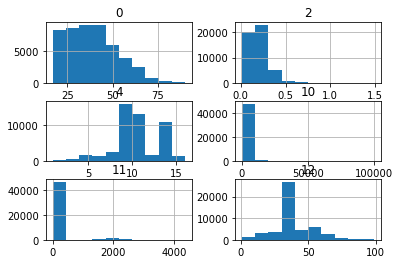

In [43]:
X.hist()

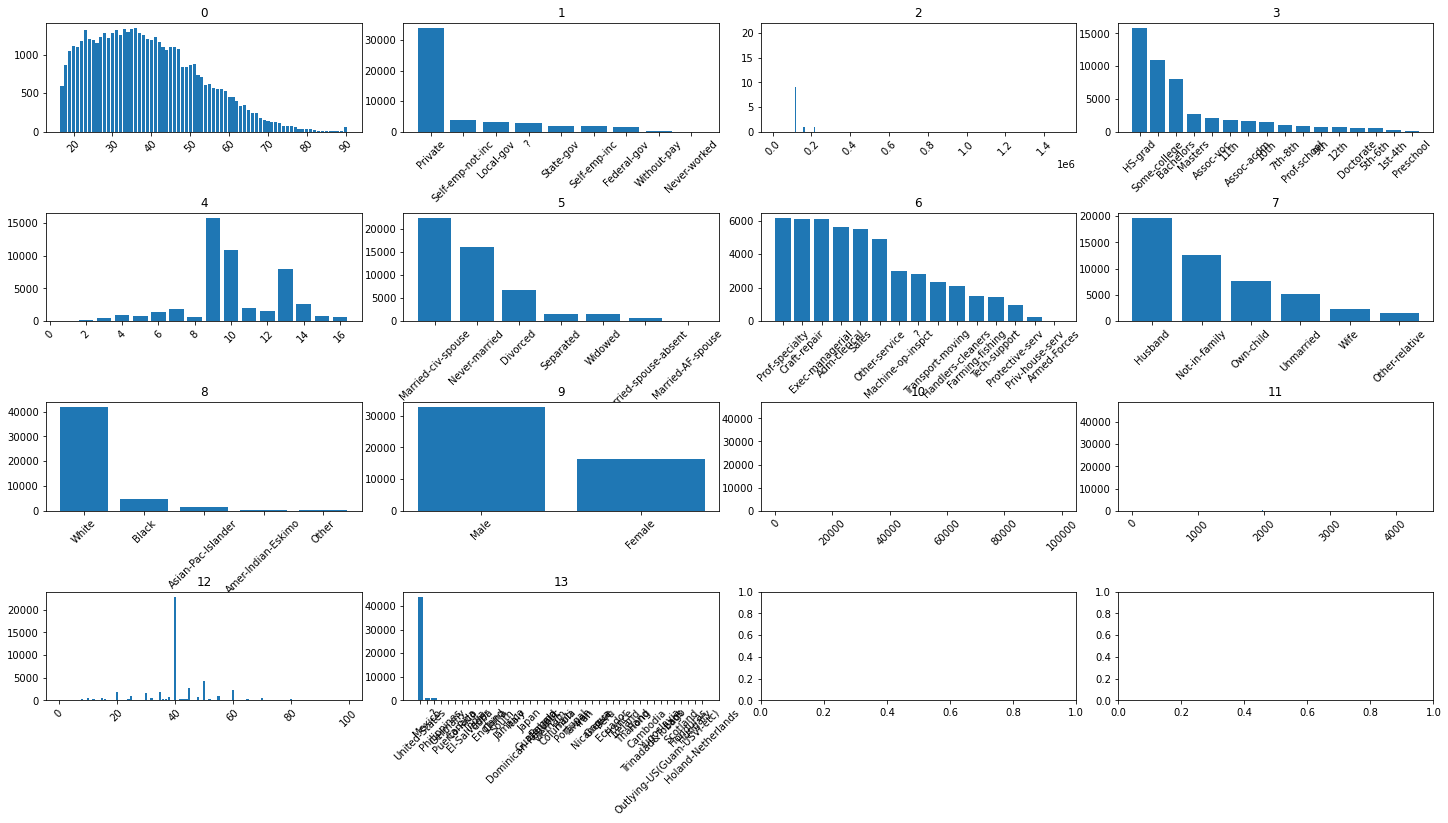

CPU times: user 36.7 s, sys: 459 ms, total: 37.2 s
Wall time: 37.2 s


In [44]:
%%time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

n = 4
figure, axis = plt.subplots(math.ceil(X.columns.size/n), n)
figure.set_size_inches(20, 10)
figure.tight_layout (h_pad= 6)

i = 0
for a in X.columns:
    axis[i//n, i%n].bar(X[a].value_counts().index,X[a].value_counts().values)
    axis[i//n, i%n].set_title(a)
    axis[i//n, i%n].tick_params(axis = 'x', labelrotation = 45)
    i += 1
plt.show()


Заменим значения '?' в столбцах на наиболее частые значения

In [45]:
X[1].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [46]:
imp = SimpleImputer(missing_values='?', strategy="most_frequent")
XX = pd.DataFrame(imp.fit_transform(X))
XX[1].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

10. Выберите колонки с числовыми и категориальными переменными.

In [47]:
XX = XX.astype(X.dtypes)
XX.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
dtype: object

In [48]:
numeric_cols = X.dtypes[X.dtypes == 'int64'].index
X[numeric_cols].head()

,0,2,4,10,11,12
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [49]:
categorial_cols = X.dtypes[X.dtypes != 'int64'].index
X[categorial_cols].head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


11. Создайте пайплайн по обработке колонок(используйте OneHotEncoder,MinMaxScaler).

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 14), (9769, 14), (39073,), (9769,))

In [134]:
numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        ("imputation_most_frequent", SimpleImputer(missing_values='?', strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorial_cols),
        ("numerical", numeric_preprocessor, numeric_cols),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))

In [135]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_most_frequent',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10,

In [136]:
y_pred = pipe.predict(X_test)

In [137]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

12. Посчитайте метрики accuracy и f1_score на предсказании только самого частого класса в целевой переменной.

In [55]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred_dummy)
f1 = f1_score(y_test, y_pred_dummy)
print(accuracy)
print(f1)

0.7589313133381104
0.8629459349356923


13. Посчитайте cross_val_score по алгоритмам LogisticRegression, SVC, LinearSVC по метрикам accuracy и f1_score.
Напишите удалось ли превзойти предыдущий результат.

In [57]:
numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        #("imputation_most_frequent", SimpleImputer(missing_values='?', strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorial_cols),
        ("numerical", numeric_preprocessor, numeric_cols),
    ]
)

pipeLR = make_pipeline(preprocessor, LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
pipeSVC = make_pipeline(preprocessor, SVC())
pipeLSVC = make_pipeline(preprocessor, LinearSVC(random_state=RANDOM_STATE))


#for pipe in [pipeLR, pipeSVC, pipeLSVC]:
#    scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
#    scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
#    print(pipe)
#    print('accuracy: ', scores_ac)
#    print('f1: ', scores_f1)


In [58]:
%%time
pipe = pipeLR
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])
accuracy:  [0.84850036 0.84829563 0.85636773 0.85135135 0.8495086 ]
f1:  [0.90331853 0.90306122 0.90856957 0.90498626 0.90392157]
CPU times: user 7.97 s, sys: 167 ms

In [59]:
%%time
pipe = pipeSVC
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('svc', SVC())])
accuracy:  [0.8362166  0.8362166  0.84490172 0.83855446 0.84398034]
f1:  [0.89656064 0.89579263 0.90202419 0.89778988 0.90101325]
CPU times: user 9min 20s, sys: 4.82 s, total: 9min 25s
Wall time: 9min 31s


In [60]:
%%time
pipe = pipeLSVC
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('linearsvc', LinearSVC(random_state=42))])
accuracy:  [0.85065002 0.85167366 0.85728911 0.85176085 0.8531941 ]
f1:  [0.90496971 0.90534979 0.90936281 0.90553236 0.90639687]
CPU times: user 10.4 s, sys: 198 ms, total: 10.6 s
Wall time: 10.6 s


**Удалось улучшить результат**

14. Можно заметить что в данных присутствуют значения '?', замените их самыми частыми значениями (испольуйте SimpleImputer)

In [61]:
numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        ("imputation_most_frequent", SimpleImputer(missing_values='?', strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorial_cols),
        ("numerical", numeric_preprocessor, numeric_cols),
    ]
)

pipeLR = make_pipeline(preprocessor, LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
pipeSVC = make_pipeline(preprocessor, SVC())
pipeLSVC = make_pipeline(preprocessor, LinearSVC(random_state=RANDOM_STATE))

15. Посчитайте cross_val_score на новых данных. Напишите удалось ли улучшить результат.

In [62]:
%%time
pipe = pipeLR
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_most_frequent',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10,

In [63]:
%%time
pipe = pipeSVC
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_most_frequent',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10,

In [64]:
%%time
pipe = pipeLSVC
scores_ac = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_most_frequent',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10,

**Замена пропущеных значений в данном случае не принесло существенного улучшения**

16. Посчитайте cross_val_score, если просто удалить значения '?'. Напишите как изменился результат

In [65]:
X_ = data.replace({'?': np.nan}).dropna().loc[:,0:13]
y_ = data.replace({'?': np.nan}).dropna().loc[:,14]
i = 1
for a in y_.unique():
    y_ = y_.replace({a:i})
    i += 1
X_.shape

(45222, 14)

In [66]:
y_.shape

(45222,)

In [67]:
numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        #("imputation_most_frequent", SimpleImputer(missing_values='?', strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorial_cols),
        ("numerical", numeric_preprocessor, numeric_cols),
    ]
)

pipeLR = make_pipeline(preprocessor, LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
pipeSVC = make_pipeline(preprocessor, SVC())
pipeLSVC = make_pipeline(preprocessor, LinearSVC(random_state=RANDOM_STATE))

In [68]:
%%time
pipe = pipeLR
scores_ac = cross_val_score(pipe, X_, y_, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X_, y_, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])
accuracy:  [0.84389165 0.844555   0.85404688 0.84575409 0.84553295]
f1:  [0.89917167 0.89958577 0.90613    0.9003073  0.90024991]
CPU times: user 7.79 s, sys: 224 ms

In [69]:
%%time
pipe = pipeSVC
scores_ac = cross_val_score(pipe, X_, y_, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X_, y_, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('svc', SVC())])
accuracy:  [0.83283582 0.83150912 0.84265812 0.83270677 0.83878815]
f1:  [0.89311466 0.89165363 0.89944174 0.89271786 0.89640472]
CPU times: user 8min 2s, sys: 3.87 s, total: 8min 6s
Wall time: 8min 11s


In [70]:
%%time
pipe = pipeLSVC
scores_ac = cross_val_score(pipe, X_, y_, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X_, y_, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('linearsvc', LinearSVC(random_state=42))])
accuracy:  [0.84610282 0.84754008 0.85393631 0.84730208 0.84763379]
f1:  [0.90092527 0.90166156 0.90619896 0.90151893 0.90171184]
CPU times: user 11 s, sys: 425 ms, total: 11.4 s
Wall time: 12.7 s


 17. Посчитайте cross_val_score для RandomForestClassifier,GradientBoostingClassifier. Напишите как изменился результат и какой вывод можно из этого сделать.

In [71]:
pipeRFC = make_pipeline(preprocessor, RandomForestClassifier(random_state=RANDOM_STATE))
pipeGBC = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=RANDOM_STATE))

In [72]:
%%time
pipe = pipeRFC
scores_ac = cross_val_score(pipe, X_, y_, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X_, y_, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])
accuracy:  [0.84997236 0.84776119 0.85338346 0.84807607 0.84564352]
f1:  [0.90246532 0.90104204 0.90494624 0.90110839 0.89965497]
CPU times: user 3min 49s, sys: 2.4 s, tota

In [73]:
%%time
pipe = pipeGBC
scores_ac = cross_val_score(pipe, X_, y_, cv=5, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X_, y_, cv=5, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac)
print('f1: ', scores_f1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])
accuracy:  [0.85925926 0.8604754  0.86764706 0.8630031  0.86432994]
f1:  [0.91002898 0.91053452 0.91550787 0.91198409 0.91320648]
CPU times: user 43.3 s, sys: 1.94 

**Алгоритмы RandomForestClassifier, GradientBoostingClassifier показали лучший результат. Т.о. ансамблевые методы работают лучше**

18. Подберите наилучшую модель, подбирая методы обработки колонок - масштабирование признаков, кодирование признаков и заполнение пропусков. Параметры алгоритмов оставьте по умолчанию. Выведите итоговые параметры и результат accuracy и f1_score.

In [179]:
numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        #("imputation", SimpleImputer(missing_values='?', strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorial_cols),
        ("numerical", numeric_preprocessor, numeric_cols),
    ]
)

pipeGBC = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=RANDOM_STATE))
#pipeGBC = make_pipeline(preprocessor, RandomForestClassifier(random_state=RANDOM_STATE))



In [180]:
%%time
pipe = pipeGBC
scores_ac = cross_val_score(pipe, X, y, scoring='accuracy')
scores_f1 = cross_val_score(pipe, X, y, scoring='f1')
print(pipe)
print('accuracy: ', scores_ac.mean())
print('f1: ', scores_f1.mean())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Int64Index([0, 2, 4, 10, 11, 12], dtype='int64'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])
accuracy:  0.8675731196536806
f1:  0.9160258070962349
CPU times: user 46.1 s, sys: 2.2 s, total: 48.3 s
Wall time: 48.6 s
